In [152]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston = load_boston()

c:\Users\tomek\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

In [153]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)


In [154]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [155]:
X = boston.data
y = boston.target

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


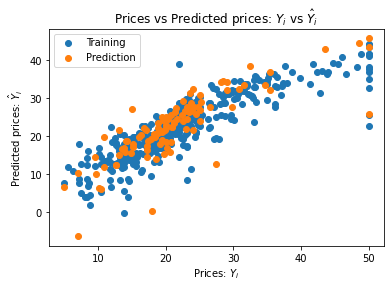

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
regr = LinearRegression()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

linreg = regr.fit(X_train_scaled, y_train)
y_pred = regr.predict(X_test_scaled)
y_train_pred = regr.predict(X_train_scaled)
plt.scatter(y_train, y_train_pred)
plt.scatter(y_test, y_pred)
plt.legend(["Training", 'Prediction'])
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [158]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

# mse bez skalowania ~~24

27.406836284337423


In [159]:
print(linreg.score(X_train_scaled, y_train))

0.7508856358979673


In [162]:
poly = PolynomialFeatures(degree=2)
poly_features_train = poly.fit_transform(X_train)
poly_features_test = poly.fit_transform(X_test)

linreg2 = LinearRegression()
linreg2.fit(poly_features_train, y_train)
y_pred = linreg2.predict(poly_features_test)
print(mean_squared_error(y_test, y_pred))
print(linreg2.score(poly_features_train, y_train))

# polepszenie wyników - zmalał błąd i wzrósł score


14.1835581006751
0.9388251257879823


C:\Users\tomek\AppData\Local\Temp/ipykernel_980/2981027535.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\tomek\AppData\Local\Temp/ipykernel_980/2981027535.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


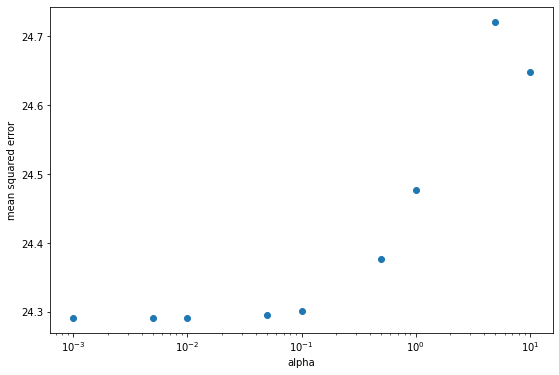

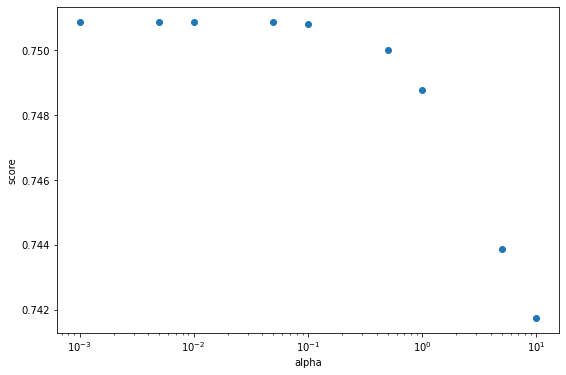

In [174]:
from sklearn.linear_model import Ridge, Lasso
import numpy as np
# ridge
alph = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
mse = []
score = []
for a in alph:
    clf = Ridge(alpha=a)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))
    score.append(clf.score(X_train, y_train))


fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(alph, mse)
ax.set_xscale("log")
ax.set_xlabel("alpha")
ax.set_ylabel("mean squared error")
fig.show()

fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(alph, score)
ax.set_xscale("log")
ax.set_xlabel("alpha")
ax.set_ylabel("score")
fig.show()

C:\Users\tomek\AppData\Local\Temp/ipykernel_980/3357939848.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\tomek\AppData\Local\Temp/ipykernel_980/3357939848.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


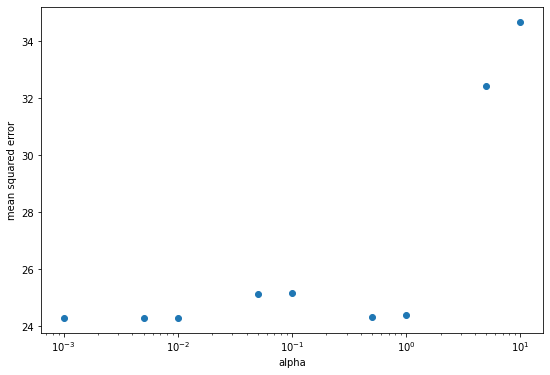

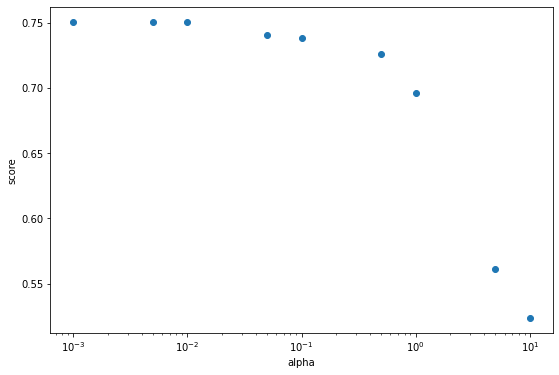

In [175]:
# lasso

mse = []
score = []
for a in alph:
    clf = Lasso(alpha=a)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))
    score.append(clf.score(X_train, y_train))


fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(alph, mse)
ax.set_xscale("log")
ax.set_xlabel("alpha")
ax.set_ylabel("mean squared error")
fig.show()

fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(alph, score)
ax.set_xscale("log")
ax.set_xlabel("alpha")
ax.set_ylabel("score")
fig.show()

C:\Users\tomek\AppData\Local\Temp/ipykernel_980/310323326.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


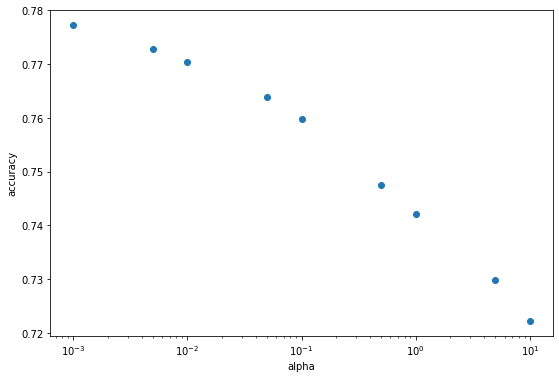

In [181]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
 
y = data.target
X = data.data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mse = []
score = []
for a in alph:
    clf = Ridge(alpha=a)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))
    score.append(clf.score(X_train, y_train))


fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(alph, score)
ax.set_xscale("log")
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
fig.show()